In [2]:
import pandas as pd
from scipy.stats import shapiro
import matplotlib.pyplot as plt

In [3]:
importacion = pd.read_excel("Datos.xlsx", sheet_name= "IMPORTACION", header=6) 
importacion = importacion.iloc[:288].reset_index(drop=True)

consumo = pd.read_excel("Datos.xlsx", sheet_name= "CONSUMO", header=6) 
consumo = consumo.iloc[:300].reset_index(drop= True)

In [4]:
importaciones = importacion[["Fecha", "Gasolina regular", "Gasolina superior", "Diesel alto azufre"]]
consumos = consumo[["Fecha", "Gasolina regular", "Gasolina superior", "Diesel alto azufre"]]

importaciones["Fecha"] = pd.to_datetime(importaciones["Fecha"])
consumos["Fecha"] = pd.to_datetime(consumos["Fecha"])
consumos.dtypes

C:\Users\dfsf2\AppData\Local\Temp\ipykernel_20908\2987316155.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importaciones["Fecha"] = pd.to_datetime(importaciones["Fecha"])
C:\Users\dfsf2\AppData\Local\Temp\ipykernel_20908\2987316155.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumos["Fecha"] = pd.to_datetime(consumos["Fecha"])


Fecha                 datetime64[ns]
Gasolina regular             float64
Gasolina superior            float64
Diesel alto azufre           float64
dtype: object

In [5]:
# Verificacion de normalidad 

stat, p = shapiro(importaciones["Gasolina regular"].dropna())
print(f"Estadístico: {stat}, p-valor: {p}")

stat, p = shapiro(importaciones["Gasolina superior"].dropna())
print(f"Estadístico: {stat}, p-valor: {p}")

stat, p = shapiro(importaciones["Diesel alto azufre"].dropna())
print(f"Estadístico: {stat}, p-valor: {p}")

stat, p = shapiro(consumos["Gasolina regular"].dropna())
print(f"Estadístico: {stat}, p-valor: {p}")

stat, p = shapiro(consumos["Gasolina superior"].dropna())
print(f"Estadístico: {stat}, p-valor: {p}")

stat, p = shapiro(consumos["Diesel alto azufre"].dropna())
print(f"Estadístico: {stat}, p-valor: {p}")

# no hay normalidad en ningun tipo de dato, consumo e importacion 


Estadístico: 0.9050018787384033, p-valor: 1.6854335852314883e-12
Estadístico: 0.9737264513969421, p-valor: 3.9037306123645976e-05
Estadístico: 0.8981665968894958, p-valor: 5.238140108297651e-13
Estadístico: 0.8451822996139526, p-valor: 1.1401759625246407e-16
Estadístico: 0.9128555655479431, p-valor: 3.507168080257861e-12
Estadístico: 0.8036144971847534, p-valor: 9.371271848268916e-19


C:\Users\dfsf2\AppData\Local\Temp\ipykernel_20908\2705175820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importaciones["Mes_num"] = importaciones["Fecha"].dt.month


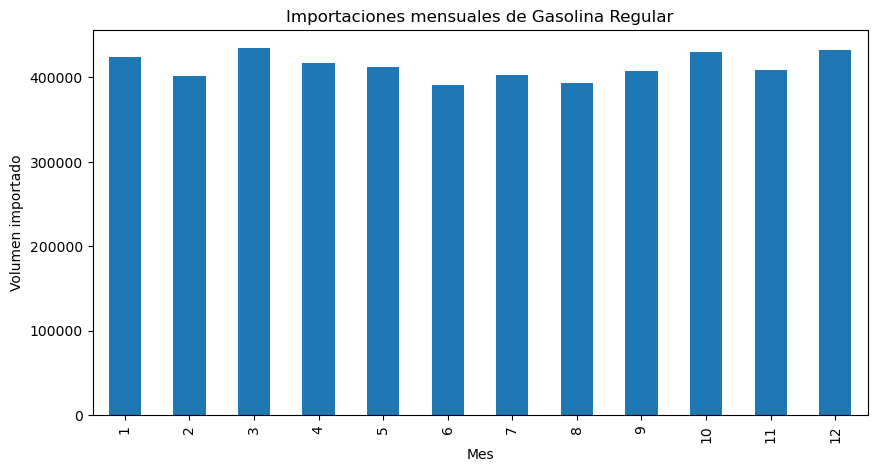

In [ ]:

importaciones["Mes_num"] = importaciones["Fecha"].dt.month

pro_mensual = importaciones.groupby(["Mes_num"])["Gasolina regular"].mean().sort_index()

plt.figure(figsize=(10,5))
pro_mensual.plot(kind="bar")
plt.title("Importaciones mensuales de Gasolina Regular")
plt.xlabel("Mes")
plt.ylabel("Volumen importado")
plt.show()


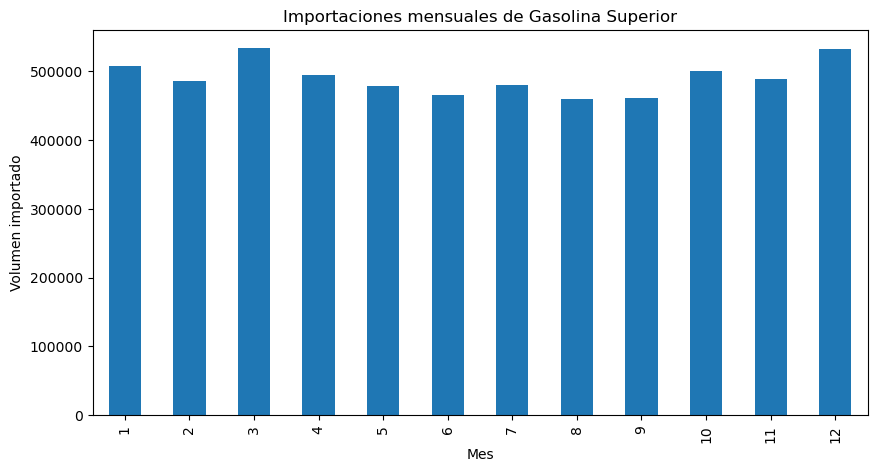

In [ ]:
pro_mensual = importaciones.groupby(["Mes_num"])["Gasolina superior"].mean().sort_index()

plt.figure(figsize=(10,5))
pro_mensual.plot(kind="bar")
plt.title("Importaciones mensuales de Gasolina Superior")
plt.xlabel("Mes")
plt.ylabel("Volumen importado")
plt.show()

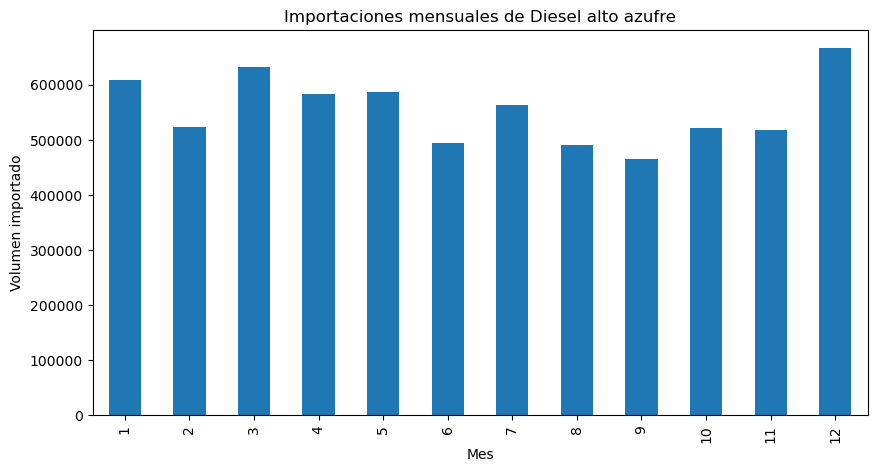

In [ ]:
pro_mensual = importaciones.groupby(["Mes_num"])["Diesel alto azufre"].mean().sort_index()

plt.figure(figsize=(10,5))
pro_mensual.plot(kind="bar")
plt.title("Importaciones mensuales de Diesel alto azufre")
plt.xlabel("Mes")
plt.ylabel("Volumen importado")
plt.show()

C:\Users\dfsf2\AppData\Local\Temp\ipykernel_20908\1579733458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumos["Mes_num"] = consumos["Fecha"].dt.month


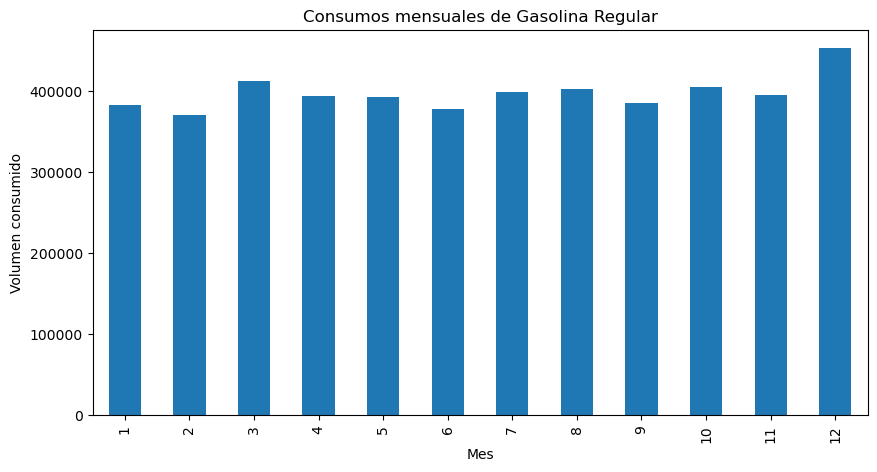

In [12]:
consumos["Mes_num"] = consumos["Fecha"].dt.month

pro_mensual = consumos.groupby(["Mes_num"])["Gasolina regular"].mean().sort_index()

plt.figure(figsize=(10,5))
pro_mensual.plot(kind="bar")
plt.title("Consumos mensuales de Gasolina Regular")
plt.xlabel("Mes")
plt.ylabel("Volumen consumido")
plt.show()

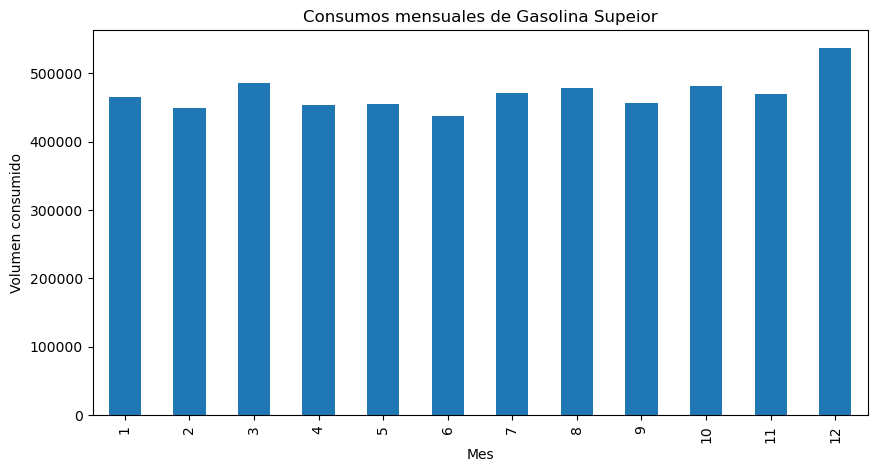

In [13]:
pro_mensual = consumos.groupby(["Mes_num"])["Gasolina superior"].mean().sort_index()

plt.figure(figsize=(10,5))
pro_mensual.plot(kind="bar")
plt.title("Consumos mensuales de Gasolina Supeior")
plt.xlabel("Mes")
plt.ylabel("Volumen consumido")
plt.show()

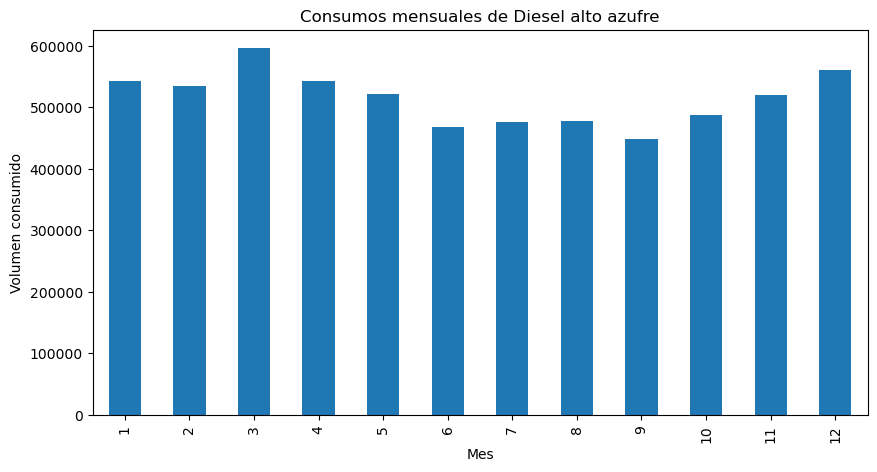

In [14]:
pro_mensual = consumos.groupby(["Mes_num"])["Diesel alto azufre"].mean().sort_index()

plt.figure(figsize=(10,5))
pro_mensual.plot(kind="bar")
plt.title("Consumos mensuales de Diesel alto azufre")
plt.xlabel("Mes")
plt.ylabel("Volumen consumido")
plt.show()

C:\Users\dfsf2\AppData\Local\Temp\ipykernel_20908\2905355110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importaciones["Año"] = importaciones["Fecha"].dt.year


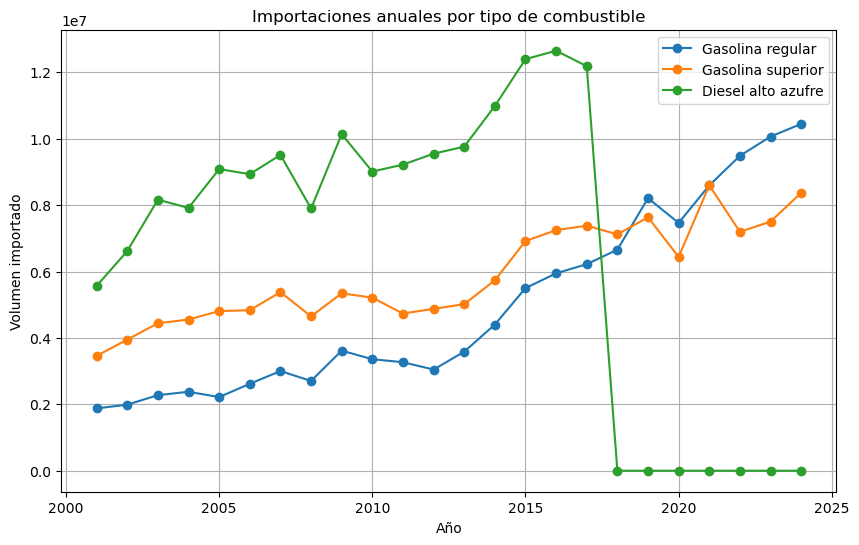

In [19]:
importaciones["Año"] = importaciones["Fecha"].dt.year
importaciones.groupby("Año")[["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]].sum().plot(
    kind="line", marker="o", figsize=(10,6)
)
plt.title("Importaciones anuales por tipo de combustible")
plt.xlabel("Año")
plt.ylabel("Volumen importado")
plt.grid(True)
plt.show()


C:\Users\dfsf2\AppData\Local\Temp\ipykernel_20908\1734223285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumos["Año"] = consumos["Fecha"].dt.year


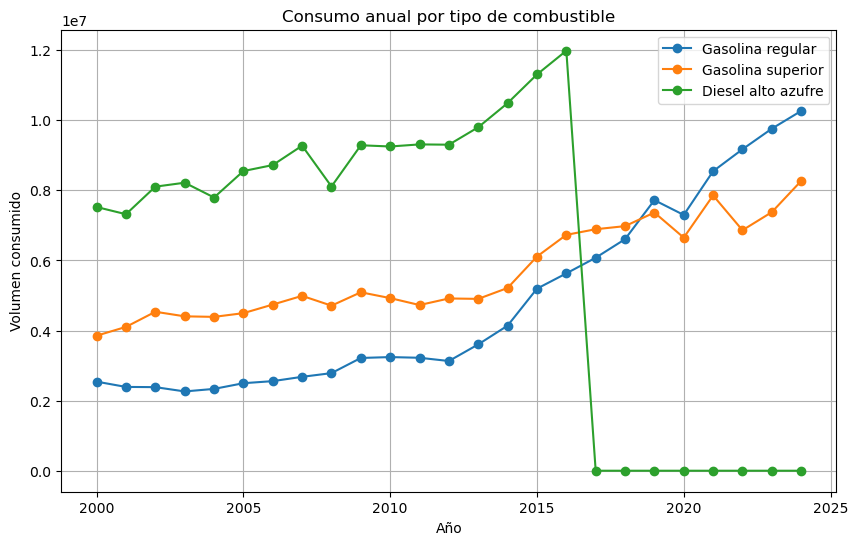

In [25]:
consumos["Año"] = consumos["Fecha"].dt.year
consumos.groupby("Año")[["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]].sum().plot(
    kind="line", marker="o", figsize=(10,6)
)
plt.title("Consumo anual por tipo de combustible")
plt.xlabel("Año")
plt.ylabel("Volumen consumido")
plt.grid(True)
plt.show()

C:\Users\dfsf2\AppData\Local\Temp\ipykernel_20908\2227494275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importaciones["Mes_nombre"] = importaciones["Fecha"].dt.strftime('%b')
C:\Users\dfsf2\AppData\Local\Temp\ipykernel_20908\2227494275.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pandemia["Año_Mes"] = pandemia["Fecha"].dt.to_period("M").astype(str)


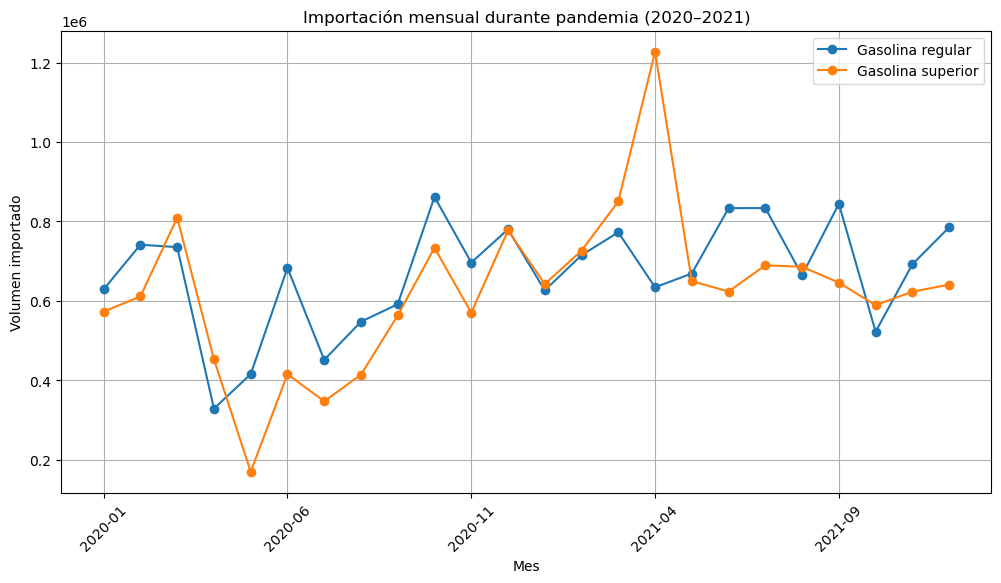

In [ ]:
importaciones["Mes_nombre"] = importaciones["Fecha"].dt.strftime('%b')

pandemia = importaciones[importaciones["Año"].isin([2020, 2021])]

pandemia["Año_Mes"] = pandemia["Fecha"].dt.to_period("M").astype(str)

mensual_pandemia = pandemia.groupby("Año_Mes")[["Gasolina regular", "Gasolina superior"]].sum()

mensual_pandemia.plot(kind="line", marker="o", figsize=(12,6))
plt.title("Importación mensual durante pandemia (2020–2021)")
plt.xlabel("Mes")
plt.ylabel("Volumen importado")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\dfsf2\AppData\Local\Temp\ipykernel_20908\814016424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumos["Mes_nombre"] = consumos["Fecha"].dt.strftime('%b')
C:\Users\dfsf2\AppData\Local\Temp\ipykernel_20908\814016424.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pandemia["Año_Mes"] = pandemia["Fecha"].dt.to_period("M").astype(str)


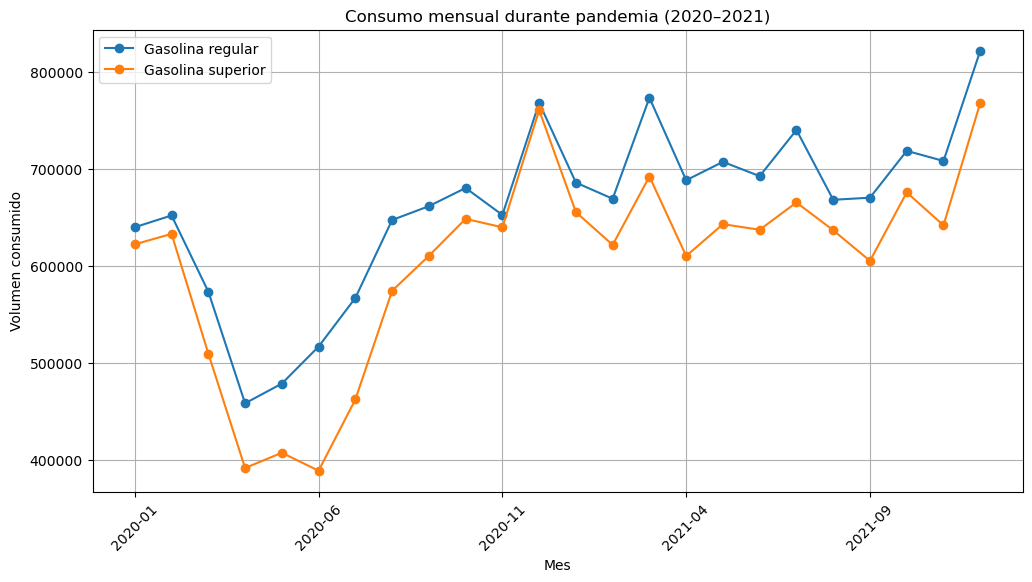

In [26]:
consumos["Mes_nombre"] = consumos["Fecha"].dt.strftime('%b')

pandemia = consumos[consumos["Año"].isin([2020, 2021])]

pandemia["Año_Mes"] = pandemia["Fecha"].dt.to_period("M").astype(str)

mensual_pandemia = pandemia.groupby("Año_Mes")[["Gasolina regular", "Gasolina superior"]].sum()

mensual_pandemia.plot(kind="line", marker="o", figsize=(12,6))
plt.title("Consumo mensual durante pandemia (2020–2021)")
plt.xlabel("Mes")
plt.ylabel("Volumen consumido")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()